#  A class for exponential random variables 

>- 1 - Define a class exponential **Exponential** with **\_\_init\_\_(self,λ)** method where **λ** is the parameter of the distribution. Supply a method **pdf** that returns the pdf function $p(x)=\lambda e^{—\lambda x}$.
>- 2 - Explain how the method of inverse distribution function presented during the lesson can be used to simulate realizations of random variables with exponential distribution. Write a method **rvs(n)** that implements this technique and returns a sample of size **n**. 
>- 3 - Define a method **hist(x)** that plots the histogram of sample list (or array) **x** together with the pdf of the exponential distribution with parameter $\lambda =1/sum({\bf x})$. Explain this choice of $\lambda$ (hint: consider the mean of an exponential distribution). 
>- 4 - Test these definitions on an example.

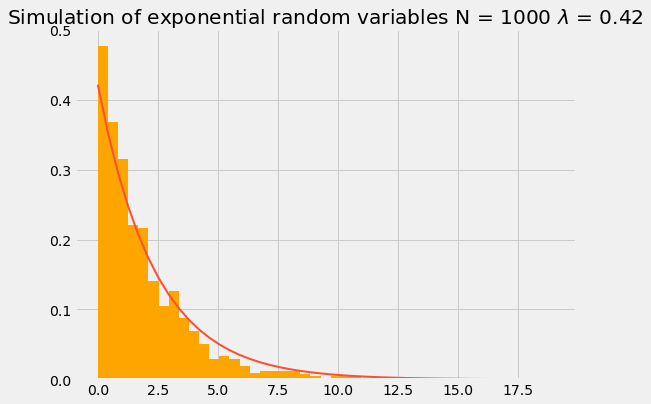

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
#from scipy.stats import expon
#import inspect
from matplotlib.pyplot import figure
plt.style.use("fivethirtyeight")

#Creating the Class 
class Exponential():
    #Question 1:
    def __init__(self, lamda):
        self.lamda=lamda
        
    def pdf(self,x):      
        return self.lamda*math.exp(-self.lamda*x)

    #solution 1 : lamda=1
    def rvs(self,n):
        values=[0]
        for i in range(1,n):
            values.append(-math.log(1-np.random.random()))                      
        return values
    #Solution 2 : using random.exponential (for verifications and tests)
    def rvs2(self,n): 
        values=[0]
        for i in range(1,n):
            values.append(np.random.exponential())
        return values
    
    #Solution 3 : the answer to the question 2
    def rvs3(self,n):
        values=[0]
        for i in range(1,n):
            values.append(((-1/self.lamda)*math.log(1-np.random.random())))
        return values
    #Question 3 
    def hist(self,X):
        H=[] 
        figure(figsize=(8, 6))
        n,bins,patches=plt.hist(X,bins='auto',density='true',facecolor='orange')
        #plt.show()
        self.lamda=(1/sum(n))
        for i in bins:
            H.append(self.pdf(i))  
        plt.plot(bins,H, linewidth=2)
        plt.title(f'Simulation of exponential random variables N = {len(X)} $\lambda$ = {round(self.lamda,2)}')
        plt.show()
               
#Testing the hist method by using random exponential variables using our rvs
test = Exponential(0.5)
#test.hist(test.rvs(100))
#test.hist(test.rvs2(100))
test.hist(test.rvs3(1000))



#Testing the hist method by using random exponential variables expon.rvs
#x = expon.rvs(size=100)
#test.hist(x)